In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfS_searches = pd.read_csv('./searches.sample.csv.bz2', sep='^', compression='bz2',nrows=10000)

In [3]:
dfS_searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [4]:
# Limpiar columna Destination, eliminar espacios y transformar a mayúscula

dfS_searches['Destination'].str.strip().str.upper()

0       AUH
1       MIL
2       SFO
3       ARN
4       MAD
5       BLR
6       PAR
7       DUB
8       ACE
9       BGW
10      BUD
11      POA
12      MXP
13      LON
14      SNN
15      SLZ
16      PHL
17      GRU
18      IKT
19      HKG
20      SEA
21      STN
22      FUE
23      IST
24      VIE
25      SAO
26      BRI
27      JED
28      CPH
29      DRS
       ... 
9969    LAX
9970    VIE
9971    VIE
9972    TUN
9973    GLA
9974    STR
9975    LAX
9976    GYD
9977    BGJ
9978    SDF
9979    MLA
9980    LAX
9981    UIO
9982    DXB
9983    PUJ
9984    OPO
9985    HAM
9986    VLI
9987    LON
9988    ROM
9989    INN
9990    LHR
9991    WDH
9992    MUC
9993    BFN
9994    MIL
9995    LAX
9996    REC
9997    PEK
9998    PAR
Name: Destination, Length: 9999, dtype: object

In [5]:
# Lista Aeropuertos Destino

list_dest = ['MAD','BCN','AGP']

In [6]:
# Dataframe 2 columnas solo para lista Aeropuertos Destino

df_Airports = dfS_searches[dfS_searches['Destination'].isin(list_dest)][['Date','Destination']]

In [7]:
df_Airports.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [8]:
# Crear nuevas columnas por año y mes

df_Airports['Date']=pd.to_datetime(df_Airports['Date'])
df_Airports['year_added']=df_Airports['Date'].dt.year
df_Airports['month_added']=df_Airports['Date'].dt.month

In [9]:
df_Airports.head()

,Date,Destination,year_added,month_added
4,2013-01-01,MAD,2013,1
93,2013-01-01,AGP,2013,1
113,2013-01-01,BCN,2013,1
147,2013-01-01,AGP,2013,1
151,2013-01-01,MAD,2013,1


In [10]:
# Agrupar Destino por año y mes

df_Airports.groupby(['Destination','year_added','month_added']).count()

,,,Date
Destination,year_added,month_added,
AGP,2013,1,48
BCN,2013,1,162
MAD,2013,1,125


In [12]:
# Leer archivo completo

list_searches = pd.DataFrame([])
tot_lines = 0
list_dest = ['MAD','BCN','AGP']
reader =  pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', sep='^', compression='bz2', iterator=True, chunksize=500000)

for df in reader: 
    df['Destination'].str.strip().str.upper()
    df_Airports = df[df['Destination'].isin(list_dest)][['Date','Destination']]
    df_Airports['Date']=pd.to_datetime(df_Airports['Date'])
    df_Airports['year_added']=df_Airports['Date'].dt.year
    df_Airports['month_added']=df_Airports['Date'].dt.month
    list_searches = list_searches.append(df_Airports)
    tot_lines+=len(df)
    print(tot_lines)
#    if tot_lines>=1000000:
#        break
    
print(list_searches.groupby(['Destination','year_added','month_added']).count().head(10))
print("Total rows: " + str(tot_lines))

500000
1000000


/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
7500000
8000000
8500000
9000000
9500000
10000000
10500000
11000000
11500000
12000000
12500000
13000000
13500000
14000000
14500000
15000000
15500000
16000000
16500000
17000000
17500000
18000000
18500000
19000000
19500000
20000000
20390198
                                     Date
Destination year_added month_added       
AGP         2013       1             9633
                       2             8379
                       3            10659
                       4             8265
                       5            10830
                       6             7923
                       7             8892
                       8             7866
                       9             8151
                       10            6499
Total rows: 20390198


In [16]:
type(list_searches)

pandas.core.frame.DataFrame

In [17]:
list_searches.size

2705528

In [18]:
list_searches.shape

(676382, 4)

In [27]:
# Dataframe monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

df_Searches = list_searches.groupby(['Destination','year_added','month_added']).count()
df_Searches

Date
Destination year_added month_added       
AGP         2013       1             9633
                       2             8379
                       3            10659
                       4             8265
                       5            10830
                       6             7923
                       7             8892
                       8             7866
                       9             8151
                       10            6499
                       11            6384
                       12            3696
BCN         2013       1            29469
                       2            28329
                       3            30552
                       4            31236
                       5            28728
                       6            26505
                       7            29241
                       8            27075
                       9            23427
                       10           20276
                       11           19824
                       12           15400
MAD         2013       1            24258
                       2            22800
                       3            24681
                       4            25251
                       5            26334
                       6            22800
                       7            22971
                       8            21831
                       9            21147
                       10           22294
                       11           20272
                       12           14504

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

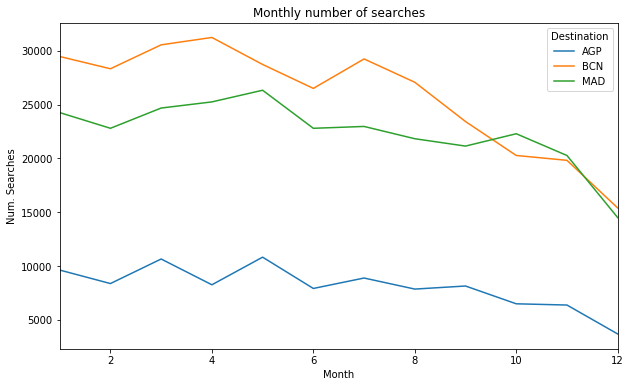

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Monthly number of searches')
ax.set(xlabel='Month', ylabel='Num. Searches')
ax.set_xlim(1,12)

figure = svm.get_figure()    
figure.savefig('monthly_searches.png', dpi=400)
sns_plot = sns.lineplot(data=df_Searches,x='month_added',y='Date', hue='Destination')
sns_plot.savefig("monthly_searches.png")